# Redes Neuronales con Tensorflow y Keras

TensorFlow (TF) es una plataforma (framework) de código abierto para aprendizaje automático con diferentes niveles de abstracción, especialmente para trabajar en bajo nivel está escrito en C++, CUDA y Python. Posee un gran conjunto de herramientas de cálculo (ej: para calcular la función gradiente) y en general trabajamos directamente con el cuando estamos trabajando con modelos de alto desempeño a la medida. Keras es una capa de abstracción para TF actuando como API, permite un rápido desarrollo y debugging de modelos y está escrita en python.

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np


# cargar un uno de los dataset (fashion mnist) que incluye keras

(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

El dataset que acabamos de importar corresponde a imagenes de tipos de prendas de vestir que viene dividido en:
* X_train (imágenes) datos de 60.000 prendas de vestir. 
* y_train las etiquetas (clases de prendas).
* X_val (imágenes) datos de 10.000 prendas de vestir para validar el modelo
* y_val las etiquetas de las 10.000 prendas de vestir.

las clases del modelo corresponden a:

|tipo de ropa|clase|
|---|---|
|T-shirt/top|0|
|Trouser|1|
|Pullover|2|
|Press|3|
|Coat|4|
|Sandal|5|
|Shirt|6|
|Sneaker|7|
|Bag|8|
|Ankle boot|9|

Para poder alimentar el modelo debemos ententer que cada imagen es un tensor de tamaño MxN y cada pixel posee un valor entre 0 (negro) y 255 (black) para el caso de imágenes en escala de grises. Si la imágen es colores con codificación RGB (Rojo, Verde, Azul) entonces la imagen es un tensor de MxNx3 y los valores de pixeles tambien varian entre 0 (ausencia de color) y 255 (maxima intensidad). Para el caso de este dataset estaremos trabajando con imagenes en escala de grises de 28x28 y cada una asociada a una etiqueta de entre 10 clases diferentes.
Dado que nuestros modelos trabajan mejor en el rango 0-1 debemos transformar nuestras imágenes a esa escala. De igual forma 

x_train shape:(60000, 28, 28) y_train shape:(60000,) 

x_test shape:(10000, 28, 28) y_train shape:(10000,) 

y = 2 - categoría: Pullover


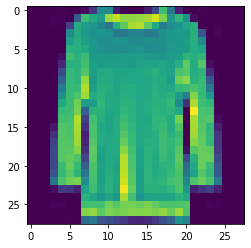

In [2]:
#Imprimimos el tamaño del conjunto de entrenamiento 
print(f"x_train shape:{X_train.shape} y_train shape:{y_train.shape} \n")

#Imprimimos el tamaño del conjunto de test 
print(f"x_test shape:{X_test.shape} y_train shape:{y_test.shape} \n")

# Definimos las etiquetas del conjunto
fashion_mnist_labels = ["T-shirt/top",  # index 0
                        "Trouser",      # index 1
                        "Pullover",     # index 2 
                        "Dress",        # index 3 
                        "Coat",         # index 4
                        "Sandal",       # index 5
                        "Shirt",        # index 6 
                        "Sneaker",      # index 7 
                        "Bag",          # index 8 
                        "Ankle boot"]   # index 9

# Escogemos un índice para visualizar ejemplo, podemos escoger 
# entre 0 and 59,999
index_example = 199

# y_train contiene las etiquetas, desde 0 a 9
label_index = y_train[index_example]

# Mostramos la etiqueta
print ("y = " + str(label_index) + " - categoría: " +(fashion_mnist_labels[label_index]))
# # Show one of the images from the training dataset
plt.imshow(X_train[index_example])

In [3]:
#Dividir los datos en entrenamiento/validacion/test

(X_train, X_val) = X_train[5000:], X_train[:5000]
(y_train, y_val) = y_train[5000:], y_train[:5000]


In [4]:
def preprocessing(x,y):
  #dividimos cada pixel por su máximo valor posible
  x = tf.cast(x, tf.float32) / 255.0
  # cada etiqueta la convertimos en tipo entero (van entre 0 y 9)
  y = tf.cast(y, tf.int32)

  return x, y

def create_dataset(xs, ys, n_classes=10):
  
  # codificamos la la etiqueta con one hot encoding, asi tendremos una
  # neurona de salida por cada clase.
  ys = tf.one_hot(ys, depth=n_classes)

  # con from_tensor_slices conbinamos diferentes elementos en un dataset
  # (features and labels), luego ordenamos aleatoriamente en creamos batch 
  # (grupos) de 128 imagenes, que será el tamaño sobre el cual
  # calcularemos nuestra función de perdida, objeto evitar que sea muy ruidosa
  return tf.data.Dataset.from_tensor_slices((xs, ys)) \
    .map(preprocessing) \
    .shuffle(len(ys)) \
    .batch(128)

In [5]:
# creamos nuevos conjuntos de validación y entrenamiento aplicando el 
# preprocesamiento.

train_dataset = create_dataset(X_train, y_train)
val_dataset = create_dataset(X_val, y_val)
test_dataset = create_dataset(X_test, y_test)


### Creamos nuestra Red Neuronal(NN) usando keras.

La mayoria de las NN se construyen apilando capas. Nuestra primera NN será de 5 capas.

La primera capa será para transformar (Reshape) nuestra entrada 2D de 28x28 a un vector 1D de 784 elementos (28*28). Luego empleamos capas densas (Dense) que significa que son interconectadas (todas las salidas de 1 con todas las entradas de la capa siguiente). Con el parámetro _units_ establecemos el número de neuronas por capa. El parámetro _activation_ específica la función de activación de cada capa (ReLU, sigmoide, Lineal, etc.). La última capa (output) tendrá 10 neuronas (1 por cada clase) y será de la cual obtendremos nuestras predicciones. Que el modelo sea secuencial, significa que estamos creando una red sin realimentaciones (se verán más adelante) que avanza desde la entrada a la salida.

In [1]:
model = keras.Sequential([
    #Primera capa
    keras.layers.Conv2D(32, kernel_size=3, activation='relu', input_shape=(28,28,1)),
    #maxPooling
    keras.layers.MaxPool2D(pool_size=(2,2)),
    #Segunda capa
    keras.layers.Conv2D(64, kernel_size=3, activation='relu'),
    #maxPooling
    keras.layers.MaxPool2D(pool_size=(2,2)),
    #Tercera Capa
    keras.layers.Conv2D(64, kernel_size=3, activation='relu'),
    #Tercera Capa
    keras.layers.Flatten(),
    #Capa de salida
    keras.layers.Dense(10, activation='softmax')
])

NameError: name 'keras' is not defined

In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 576)              

#### Entrenando la Red
Para entrenar la red debemos definir algunos parámetros como, el optimizador que usaremos para el algoritmo de "Back propagation", la función de pérdida a emplear y la métrica con la cual mediremos el desempeño de la red eso se hace con el método compile de nuestro modelo.
Acto seguido deberemos ingresar nuestro conjunto de entrenamiento, la cantidad e epocas a entrenar, la cantidad de pasos por epocas, el conjunto de validación y la cantidad de pasos de validación.

In [24]:
from tensorflow.keras.callbacks import EarlyStopping


In [27]:
estop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True )

model.compile(optimizer='adam',
              # el vectos y está en forma de un tensor logits, esto es el 
              # inverso de la función sigmoide a nivel de elementos
              loss=tf.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

history = model.fit(
    train_dataset.repeat(),
    epochs = 100,
    steps_per_epoch=200,
    batch_size=64,
    validation_data=val_dataset.repeat(),
    validation_steps = 3,
    callbacks=[estop]
    )

Epoch 1/100
200/200 [==============================] - 25s 113ms/step - loss: 0.3808 - accuracy: 0.8638 - val_loss: 0.3960 - val_accuracy: 0.8542
Epoch 2/100
200/200 [==============================] - 23s 113ms/step - loss: 0.3604 - accuracy: 0.8729 - val_loss: 0.3243 - val_accuracy: 0.8906
Epoch 3/100
200/200 [==============================] - 24s 120ms/step - loss: 0.3360 - accuracy: 0.8814 - val_loss: 0.3829 - val_accuracy: 0.8672
Epoch 4/100
200/200 [==============================] - 22s 111ms/step - loss: 0.3252 - accuracy: 0.8822 - val_loss: 0.3012 - val_accuracy: 0.8906
Epoch 5/100
200/200 [==============================] - 27s 136ms/step - loss: 0.3096 - accuracy: 0.8885 - val_loss: 0.2476 - val_accuracy: 0.9219
Epoch 6/100
200/200 [==============================] - 22s 112ms/step - loss: 0.2932 - accuracy: 0.8945 - val_loss: 0.2692 - val_accuracy: 0.9062
Epoch 7/100
200/200 [==============================] - 24s 121ms/step - loss: 0.2916 - accuracy: 0.8959 - val_loss: 0.3236 -

In [28]:
def plot_history(history, width=12, height=6):
  """
  DESCRIPTION:
    Historical performance of the keras model
  
  INPUT:
    @param history: history of performance of fitted model
    @type history: tensorflow.python.keras.callbacks.History

    @param width: width of the graphic display
    @type width: int

    @param height: height of the graphic display
    @type height: int

  OUTPUT:
    A graphic
  """

  ## Metrics keys stored in tensorflow object
  keys = list(history.history.keys())

  ## Number of epoch used for fit the model
  epoch = range(1, len(history.epoch) +1)

  ## Check if validation set was used.
  withValidation = False
  for key in keys:
    if 'val' in key:
      withValidation = True

  ## Number of metrics 
  nMetrics = len(keys)
  if withValidation:
    nMetrics = nMetrics//2

   ## Plot-space instance
  plt.figure(figsize=(width, height))

  for i in range(nMetrics):
    plt.subplot(nMetrics, 1, i+1)

    ## Plot (train) metric value
    labelMetric = keys[i]
    metric = history.history[keys[i]]
    plt.plot(epoch, metric, 'o-', label=labelMetric)

    if withValidation:
      ## Plot (validation) metric value
      labelMetricVal = keys[i+nMetrics]
      metricVal = history.history[keys[i+nMetrics]]
      plt.plot(epoch, metricVal, 'o-', label=labelMetricVal)

    plt.xlim(epoch[0], epoch[-1])
    plt.legend()
    plt.grid()

  plt.xlabel('Epoch')
  plt.show()

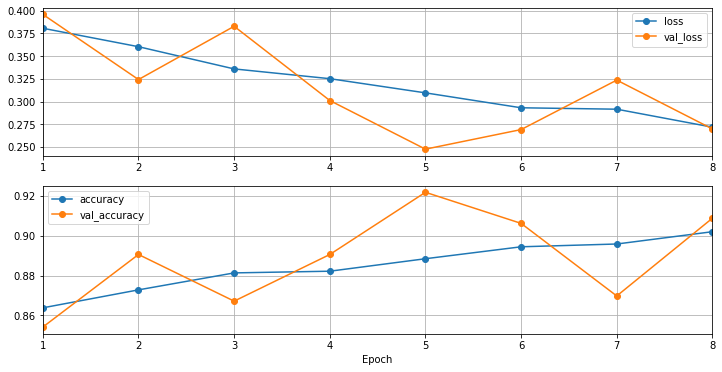

In [29]:
plot_history(history)

In [12]:
#guardamos el modelo
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
model.save('./MyDrive/ayudantia/modeloCNN.h5')

In [31]:
modelCNN = tf.keras.models.load_model('./MyDrive/ayudantia/modeloCNN.h5')
modelCNN.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 576)              

In [32]:
# Evaluamos el modelo en el conjunto de test
score = modelCNN.evaluate(test_dataset, verbose=0)

# Test accuracy
print(f'Test accuracy: {score[1]*100:.3f}%')

Test accuracy: 88.360%


In [33]:
# Clasification Report
from sklearn.metrics import classification_report
y_pred = modelCNN.predict(X_test)
y_pred_index = np.argmax(y_pred, axis=1)
report = classification_report(y_test, y_pred_index)

print(report)

313/313 [==============================] - 4s 12ms/step
              precision    recall  f1-score   support

           0       0.85      0.74      0.79      1000
           1       0.82      0.98      0.89      1000
           2       0.84      0.77      0.80      1000
           3       0.95      0.64      0.76      1000
           4       0.76      0.85      0.81      1000
           5       0.84      0.98      0.91      1000
           6       0.61      0.74      0.67      1000
           7       0.97      0.80      0.88      1000
           8       0.95      0.96      0.96      1000
           9       0.95      0.94      0.95      1000

    accuracy                           0.84     10000
   macro avg       0.85      0.84      0.84     10000
weighted avg       0.85      0.84      0.84     10000



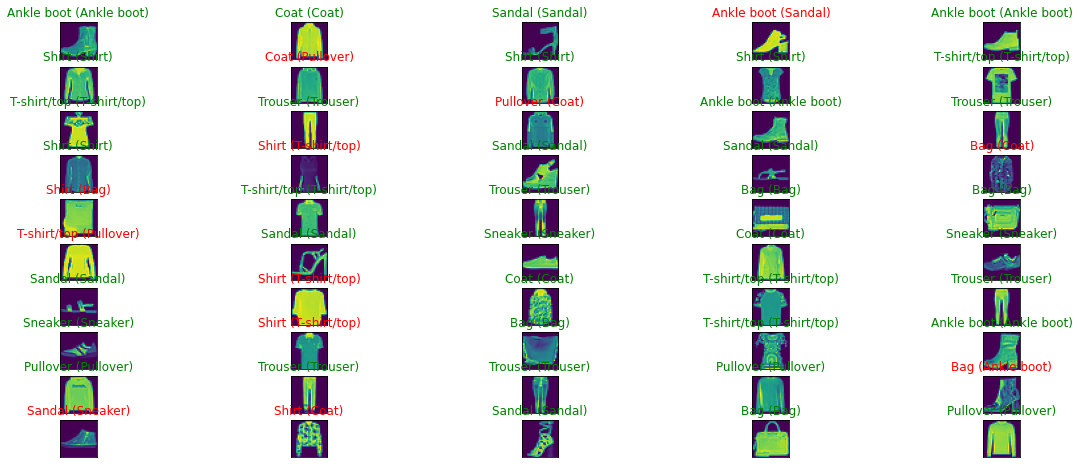

In [35]:
import numpy as np
# Graficar un muestreo aleatorio de imágenes con su preddición y valor de
# verdad

figure = plt.figure(figsize=(20,8))
for i, index in enumerate(np.random.choice(X_test.shape[0], size=50, replace=False)):
  ax = figure.add_subplot(10, 5, i+1, xticks=[], yticks=[])
  #Mostrar imágenes
  ax.imshow(np.squeeze(X_test[index]))
  predict_index = np.argmax(y_pred[index])
  true_index = y_test[index] # aquí había un error. se debe eliminar el np.argmax

  ax.set_title("{} ({})".format(fashion_mnist_labels[predict_index],
                                 fashion_mnist_labels[true_index]),
                                 color=('green' if predict_index == true_index else 'red'))
  
  

## Hemos entrenado un clasificador con NN con un accuracy del 90.6%

---

## Visualicemos lo que aprendió la red

In [36]:
for i, layer in enumerate(modelCNN.layers):

  # chequeamos si es capa convolucional
  if 'conv' not in layer.name:
    continue
  
  filters, biases = layer.get_weights()
  print(f'layer n°: {i}, | {layer.name}, {filters.shape}')



layer n°: 0, | conv2d_3, (3, 3, 1, 32)
layer n°: 2, | conv2d_4, (3, 3, 32, 64)
layer n°: 4, | conv2d_5, (3, 3, 64, 64)


conv2d_3 (3, 3, 1, 32)


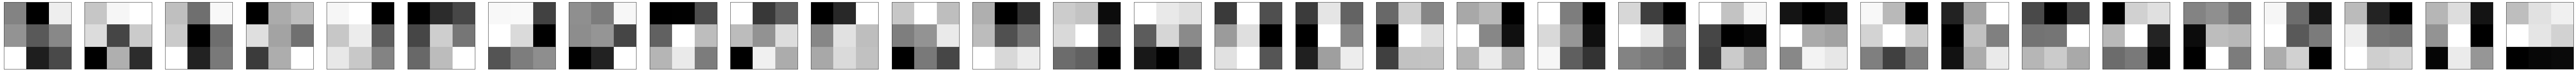

conv2d_4 (3, 3, 1, 32)


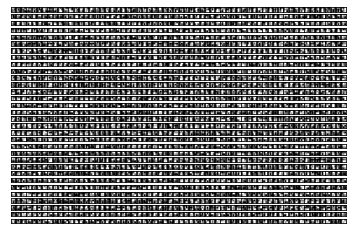

conv2d_5 (3, 3, 32, 64)


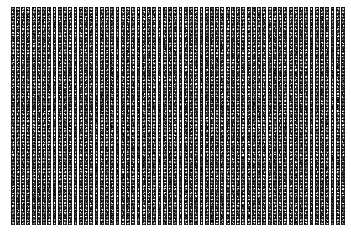

In [39]:
# Normalizamos los filtros para visualizarlos (0-1)

#canales en [2]
#numero de filtros [3]
fig = plt.figure(figsize=(128,64))
for layer in model.layers:
    if 'conv' in layer.name:
        weights, bias= layer.get_weights()
        print(layer.name, filters.shape)
        
        #normalize filter values between  0 and 1 for visualization
        f_min, f_max = weights.min(), weights.max()
        filters = (weights - f_min) / (f_max - f_min)  
        filter_cnt=1
        
        filter_num = filters.shape[3]
        channel_num = filters.shape[2]
        #plotting all the filters
        for i in range(filter_num):
            #get the filters
            filt=filters[:,:,:, i]
            #plotting each of the channel, color image RGB channels
            for j in range(channel_num):
                                  #nrows, ncols
                ax= plt.subplot(channel_num, filter_num, filter_cnt)
                ax.set_xticks([])
                ax.set_yticks([])
                plt.imshow(filt[:,:, j], cmap='gray')
                filter_cnt+=1
                
        plt.show()